In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



In [41]:

train_dir = '/Users/gam/Desktop/Model_Food_classification-/Dataset/ML_NutriCheck/train'
val_dir = '/Users/gam/Desktop/Model_Food_classification-/Dataset/ML_NutriCheck/validation'
test_dir = '/Users/gam/Desktop/Model_Food_classification-/Dataset/ML_NutriCheck/test'

# Set up ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),  # Resize all images
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 21200 images belonging to 53 classes.
Found 5300 images belonging to 53 classes.
Found 5300 images belonging to 53 classes.


In [43]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(53, activation='softmax')  # 4 classes: glioma, meningioma, normal, pituitary
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 53)             │         6,837 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,845,813 (56.63 MB)

 Trainable params: 14,845,813 (56.63 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)




Epoch 1/10
663/663 ━━━━━━━━━━━━━━━━━━━━ 526s 792ms/step - accuracy: 0.0286 - loss: 4.0218 - val_accuracy: 0.0817 - val_loss: 3.6514
Epoch 2/10
663/663 ━━━━━━━━━━━━━━━━━━━━ 498s 751ms/step - accuracy: 0.0833 - loss: 3.6122 - val_accuracy: 0.1453 - val_loss: 3.3688
Epoch 3/10
663/663 ━━━━━━━━━━━━━━━━━━━━ 494s 745ms/step - accuracy: 0.1654 - loss: 3.1983 - val_accuracy: 0.1666 - val_loss: 3.2098
Epoch 4/10
663/663 ━━━━━━━━━━━━━━━━━━━━ 478s 721ms/step - accuracy: 0.2882 - loss: 2.6496 - val_accuracy: 0.1942 - val_loss: 3.1215
Epoch 5/10
663/663 ━━━━━━━━━━━━━━━━━━━━ 488s 735ms/step - accuracy: 0.4533 - loss: 1.9516 - val_accuracy: 0.1862 - val_loss: 3.3190
Epoch 6/10
663/663 ━━━━━━━━━━━━━━━━━━━━ 470s 709ms/step - accuracy: 0.6153 - loss: 1.3256 - val_accuracy: 0.1794 - val_loss: 3.7834
Epoch 7/10
663/663 ━━━━━━━━━━━━━━━━━━━━ 475s 716ms/step - accuracy: 0.7244 - loss: 0.9176 - val_accuracy: 0.1872 - val_loss: 4.1444
Epoch 8/10
663/663 ━━━━━━━━━━━━━━━━━━━━ 459s 692ms/step - accuracy: 0.7917 -

In [45]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

166/166 ━━━━━━━━━━━━━━━━━━━━ 28s 169ms/step - accuracy: 0.1824 - loss: 5.1439
Test Accuracy: 0.1794


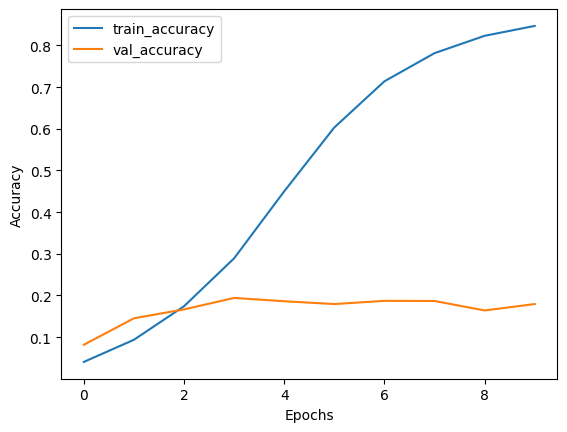

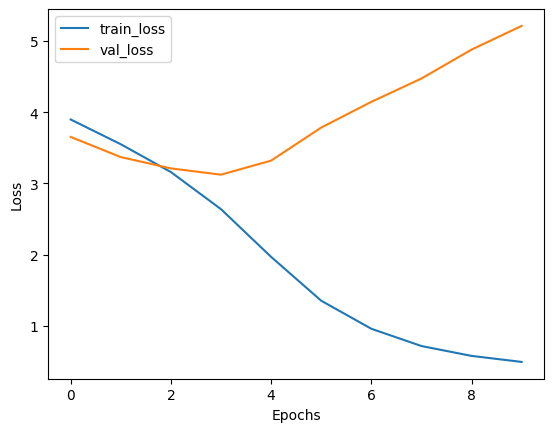

In [46]:
#plot the accuracy and loss curves
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

166/166 ━━━━━━━━━━━━━━━━━━━━ 28s 166ms/step


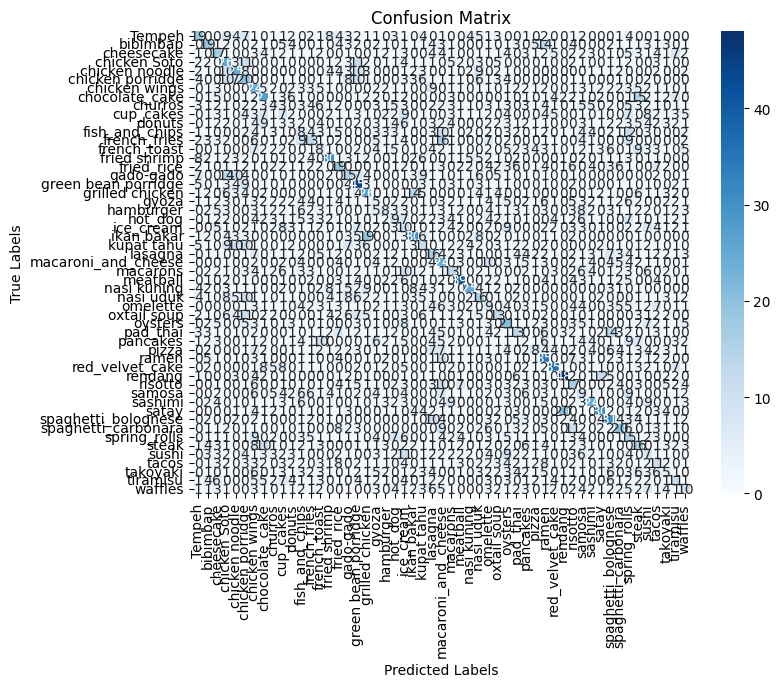

In [47]:
#plot confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix

# Get true and predicted classes
true_classes = test_generator.classes  # True labels
predictions = model.predict(test_generator)  # Model predictions
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
class_labels = list(test_generator.class_indices.keys())  # Class labels

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [48]:
model.save("Classification_model.h5")